# Problem Statement
    Analyze and Provide Insights on Amazon Sales Report

# Problem Description
    The provided dataset contains information about sales transacƟons on Amazon, including details such as order ID, date, status, fulfilment method,sales channel, product category, size, qty, amount, shipping details, and more. The objecƟve is to conduct a comprehensive analysis of the data and extract acaonable insights to support business decision-making. 

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\Arfa\OneDrive\Desktop\Innobyte services\Amazon Sale Report.csv')

In [5]:
#Check No.of Rows and Columns
df.shape

(128976, 21)

In [7]:
#Read the dataset
df.head(2)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel ship-service-level Category Size Courier Status  \
0   Merchant     Amazon.in           Standard  T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard    Shirt  3XL        Shipped   

   ...  currency  Amount  ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62     MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00  BENGALURU    KARNATAKA         560085.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  

[2 rows x 21 columns]

In [9]:
df.head(5)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62       MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00    BENGALURU    KARNATAKA         560085.0   
2  ...       INR  329.00  NAVI MUMBAI  MAHARASHTRA         410210.0   
3  ...       INR  753.33   PUDUCHERRY   PUDUCHERRY         605008.0   
4  ...       INR  574.00      CHENNAI   TAMIL NADU         600073.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  
2            IN   True           NaN NaN       NaN  
3            IN  False     Easy Ship NaN       NaN  
4            IN  False           NaN NaN       NaN  

[5 rows x 21 columns]

In [11]:
df.tail()

index             Order ID      Date   Status Fulfilment  \
128971  128970  406-6001380-7673107  05-31-22  Shipped     Amazon   
128972  128971  402-9551604-7544318  05-31-22  Shipped     Amazon   
128973  128972  407-9547469-3152358  05-31-22  Shipped     Amazon   
128974  128973  402-6184140-0545956  05-31-22  Shipped     Amazon   
128975  128974  408-7436540-8728312  05-31-22  Shipped     Amazon   

       Sales Channel ship-service-level Category Size Courier Status  ...  \
128971     Amazon.in          Expedited    Shirt   XL        Shipped  ...   
128972     Amazon.in          Expedited  T-shirt    M        Shipped  ...   
128973     Amazon.in          Expedited  Blazzer  XXL        Shipped  ...   
128974     Amazon.in          Expedited  T-shirt   XS        Shipped  ...   
128975     Amazon.in          Expedited  T-shirt    S        Shipped  ...   

        currency  Amount  ship-city    ship-state ship-postal-code  \
128971       INR   517.0  HYDERABAD     TELANGANA         500013.0   
128972       INR   999.0   GURUGRAM       HARYANA         122004.0   
128973       INR   690.0  HYDERABAD     TELANGANA         500049.0   
128974       INR  1199.0      Halol       Gujarat         389350.0   
128975       INR   696.0     Raipur  CHHATTISGARH         492014.0   

        ship-country    B2B  fulfilled-by New  PendingS  
128971            IN  False           NaN NaN       NaN  
128972            IN  False           NaN NaN       NaN  
128973            IN  False           NaN NaN       NaN  
128974            IN  False           NaN NaN       NaN  
128975            IN  False           NaN NaN       NaN  

[5 rows x 21 columns]

In [13]:
#Check missing values
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [15]:
#Checking null value
pd.isnull(df)

index  Order ID   Date  Status  Fulfilment  Sales Channel  \
0       False     False  False   False       False          False   
1       False     False  False   False       False          False   
2       False     False  False   False       False          False   
3       False     False  False   False       False          False   
4       False     False  False   False       False          False   
...       ...       ...    ...     ...         ...            ...   
128971  False     False  False   False       False          False   
128972  False     False  False   False       False          False   
128973  False     False  False   False       False          False   
128974  False     False  False   False       False          False   
128975  False     False  False   False       False          False   

        ship-service-level  Category   Size  Courier Status  ...  currency  \
0                    False     False  False           False  ...     False   
1                    False     False  False           False  ...     False   
2                    False     False  False           False  ...     False   
3                    False     False  False           False  ...     False   
4                    False     False  False           False  ...     False   
...                    ...       ...    ...             ...  ...       ...   
128971               False     False  False           False  ...     False   
128972               False     False  False           False  ...     False   
128973               False     False  False           False  ...     False   
128974               False     False  False           False  ...     False   
128975               False     False  False           False  ...     False   

        Amount  ship-city  ship-state  ship-postal-code  ship-country    B2B  \
0        False      False       False             False         False  False   
1        False      False       False             False         False  False   
2        False      False       False             False         False  False   
3        False      False       False             False         False  False   
4        False      False       False             False         False  False   
...        ...        ...         ...               ...           ...    ...   
128971   False      False       False             False         False  False   
128972   False      False       False             False         False  False   
128973   False      False       False             False         False  False   
128974   False      False       False             False         False  False   
128975   False      False       False             False         False  False   

        fulfilled-by   New  PendingS  
0              False  True      True  
1              False  True      True  
2               True  True      True  
3              False  True      True  
4               True  True      True  
...              ...   ...       ...  
128971          True  True      True  
128972          True  True      True  
128973          True  True      True  
128974          True  True      True  
128975          True  True      True  

[128976 rows x 21 columns]

In [17]:
# check duplicated values
df.duplicated().sum()

168

###### There is 168 missing values in dataset.

In [19]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [17]:
#Check no.of unique values in each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [21]:
#Check the no.of unique values in each columns
df.nunique()

index                 128808
Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
currency                   1
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
ship-country               1
B2B                        2
fulfilled-by               1
New                        0
PendingS                   0
dtype: int64

In [23]:
# Check the Statistical summary
df.describe()

index            Qty         Amount  ship-postal-code  New  \
count  128976.000000  128976.000000  121176.000000     128941.000000  0.0   
mean    64486.130427       0.904401     648.562176     463945.677744  NaN   
std     37232.897832       0.313368     281.185041     191458.488954  NaN   
min         0.000000       0.000000       0.000000     110001.000000  NaN   
25%     32242.750000       1.000000     449.000000     382421.000000  NaN   
50%     64486.500000       1.000000     605.000000     500033.000000  NaN   
75%     96730.250000       1.000000     788.000000     600024.000000  NaN   
max    128974.000000      15.000000    5584.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [27]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

# Data Cleaning

In [29]:
df_copy= df.copy()

In [31]:
df_copy.head(2)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel ship-service-level Category Size Courier Status  \
0   Merchant     Amazon.in           Standard  T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard    Shirt  3XL        Shipped   

   ...  currency  Amount  ship-city   ship-state ship-postal-code  \
0  ...       INR  647.62     MUMBAI  MAHARASHTRA         400081.0   
1  ...       INR  406.00  BENGALURU    KARNATAKA         560085.0   

   ship-country    B2B  fulfilled-by New  PendingS  
0            IN  False     Easy Ship NaN       NaN  
1            IN  False     Easy Ship NaN       NaN  

[2 rows x 21 columns]

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [45]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True, errors='ignore')

In [47]:
df_copy.head(2)

index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel ship-service-level Category Size Courier Status  \
0   Merchant     Amazon.in           Standard  T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard    Shirt  3XL        Shipped   

   Qty currency  Amount  ship-city   ship-state  ship-postal-code  \
0    0      INR  647.62     MUMBAI  MAHARASHTRA          400081.0   
1    1      INR  406.00  BENGALURU    KARNATAKA          560085.0   

  ship-country    B2B fulfilled-by  
0           IN  False    Easy Ship  
1           IN  False    Easy Ship

In [53]:
df_copy.drop(['index'], axis=1, inplace=True)

In [55]:
df_copy.head(2)

Order ID      Date                        Status Fulfilment  \
0  405-8078784-5731545  04-30-22                     Cancelled   Merchant   
1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   Merchant   

  Sales Channel ship-service-level Category Size Courier Status  Qty currency  \
0     Amazon.in           Standard  T-shirt    S     On the Way    0      INR   
1     Amazon.in           Standard    Shirt  3XL        Shipped    1      INR   

   Amount  ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  647.62     MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  406.00  BENGALURU    KARNATAKA          560085.0           IN  False   

  fulfilled-by  
0    Easy Ship  
1    Easy Ship

###### Remove duplicated data

In [63]:
# Duplicated Records
df.duplicated().sum()

959

###### After drop the some columns we achieve 959 records that have duplicate.

In [65]:
print(df_copy.columns)

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')


In [67]:
df_copy = df_copy.drop_duplicates(subset='Order ID',keep='first')

In [69]:
df_copy.duplicated().sum()

0

###### There is no duplicated data.

## Finding some errors and remove it from dataset

In [77]:
df_copy.Date.dtypes

dtype('O')

In [85]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [89]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120229 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120229 non-null  object        
 1   Date                120229 non-null  datetime64[ns]
 2   Status              120229 non-null  object        
 3   Fulfilment          120229 non-null  object        
 4   Sales Channel       120229 non-null  object        
 5   ship-service-level  120229 non-null  object        
 6   Category            120229 non-null  object        
 7   Size                120229 non-null  object        
 8   Courier Status      120229 non-null  object        
 9   Qty                 120229 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           120201 non-null  object        
 13  ship-state          120201 non-nul

In [97]:
df_copy['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [125]:
df_copy['Status'] = df_copy['Status'].str.split('_').str[0]
df_copy['Order Status'] = df_copy['Status'].str.split('_').str[1]

In [127]:
df_copy.head(2)

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   

  Sales Channel ship-service-level Category Size Courier Status  Qty currency  \
0     Amazon.in           Standard  T-shirt    S     On the Way    0      INR   
1     Amazon.in           Standard    Shirt  3XL        Shipped    1      INR   

   Amount  ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  647.62     MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  406.00  BENGALURU    KARNATAKA          560085.0           IN  False   

  fulfilled-by  Order Status  
0    Easy Ship           NaN  
1    Easy Ship           NaN

In [131]:
df_copy['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [133]:
df_copy['Order Status'].unique()

array([nan])

In [135]:
df_copy['Order Status'].isnull().sum()

120229

In [137]:
df_copy['Order Status'] = df_copy['Order Status'].replace(np.nan, "loading")

In [139]:
df_copy['Order Status'].unique()

array(['loading'], dtype=object)

In [141]:
df_copy['Order Status'].isnull().sum()

0

In [143]:
df_copy.head(2)

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   

  Sales Channel ship-service-level Category Size Courier Status  Qty currency  \
0     Amazon.in           Standard  T-shirt    S     On the Way    0      INR   
1     Amazon.in           Standard    Shirt  3XL        Shipped    1      INR   

   Amount  ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  647.62     MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  406.00  BENGALURU    KARNATAKA          560085.0           IN  False   

  fulfilled-by Order Status  
0    Easy Ship      loading  
1    Easy Ship      loading

In [145]:
# Handle the Fulfilment Colomn
df_copy['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

There is no any error in column fulfilment

In [147]:
# Handle the Sales Channel Colomn
df_copy['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

There is one error in column Sales Channel i.e "in"

In [149]:
#Remove the error
df_copy['Sales Channel'] = df_copy['Sales Channel'].replace('Amazon.in','Amazon')

In [151]:
df_copy['Sales Channel'].unique()

array(['Amazon', 'Non-Amazon'], dtype=object)

In [153]:
df_copy.head(2)

Order ID       Date                        Status Fulfilment  \
0  405-8078784-5731545 2022-04-30                     Cancelled   Merchant   
1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   Merchant   

  Sales Channel ship-service-level Category Size Courier Status  Qty currency  \
0        Amazon           Standard  T-shirt    S     On the Way    0      INR   
1        Amazon           Standard    Shirt  3XL        Shipped    1      INR   

   Amount  ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  647.62     MUMBAI  MAHARASHTRA          400081.0           IN  False   
1  406.00  BENGALURU    KARNATAKA          560085.0           IN  False   

  fulfilled-by Order Status  
0    Easy Ship      loading  
1    Easy Ship      loading

In [155]:
# Handle the ship-service-level Colomn
df_copy['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [157]:
# Handle the Category Colomn
df_copy['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [159]:
# Handle the Size Colomn
df_copy['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [161]:
# Handle the Courier Status Colomn
df_copy['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [163]:
# Handle the Qty Colomn
df_copy['Qty'].unique()

array([ 0,  1,  2, 15,  3,  9, 13,  5,  4], dtype=int64)

In [165]:
# Handle the currency Colomn
df_copy['currency'].unique()

array(['INR', nan], dtype=object)

There is no error in above columns

In [167]:
# Ship-city column
df_copy['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [171]:
df_copy['ship-city'] = df_copy['ship-city'].str.upper()

In [181]:
# Remove special character and number
def clean_text(text):
    if isinstance(text,str):
        return re.sub(r'[^A-Za-z\s]','',text)
    else:
        return text

In [183]:
df_copy['ship-city'] = df_copy['ship-city'].apply(clean_text)

In [185]:
df_copy['ship-city'].isnull().sum()

28

In [187]:
df_copy['ship-city'] = df_copy['ship-city'].replace(np.nan,"NA")

In [189]:
df_copy['ship-city'].isnull().sum()

0

In [191]:
df_copy['ship-state'] = df_copy['ship-state'].str.upper()

In [193]:
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'NL', 'MIZORAM', 'NEW DELHI',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RJ', 'ORISSA', 'LAKSHADWEEP', 'PB',
       'APO', 'AR', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [199]:
df_copy['ship-state'] = df_copy['ship-state'].replace("RJ","RAJASTHAN")
df_copy['ship-state'] = df_copy['ship-state'].replace("NL","NAGALAND")
df_copy['ship-state'] = df_copy['ship-state'].replace("PB","PUNJAB")
df_copy['ship-state'] = df_copy['ship-state'].replace("APO","ANDHRA PRADESH")
df_copy['ship-state'] = df_copy['ship-state'].replace("DELHI","NEW DELHI")
df_copy['ship-state'] = df_copy['ship-state'].replace("AR","ARUNACHAL PRADESH")

In [201]:
df_copy['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'PUDUCHERRY', 'TAMIL NADU',
       'UTTAR PRADESH', 'CHANDIGARH', 'TELANGANA', 'ANDHRA PRADESH',
       'RAJASTHAN', 'NEW DELHI', 'HARYANA', 'ASSAM', 'JHARKHAND',
       'CHHATTISGARH', 'ODISHA', 'KERALA', 'MADHYA PRADESH',
       'WEST BENGAL', 'NAGALAND', 'GUJARAT', 'UTTARAKHAND', 'BIHAR',
       'JAMMU & KASHMIR', 'PUNJAB', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'RAJSHTHAN', 'MIZORAM', 'PUNJAB/MOHALI/ZIRAKPUR', 'ORISSA',
       'LAKSHADWEEP', 'PONDICHERRY', 'RAJSTHAN'], dtype=object)

In [203]:
df_copy['ship-state'].isnull().sum()

28

In [205]:
df_copy['ship-state'] = df_copy['ship-state'].replace(np.nan,"NA")

In [207]:
df_copy['ship-state'].isnull().sum()

0

In [211]:
#ship-country
df_copy['ship-country'].unique()

array(['IN', nan], dtype=object)

In [227]:
df_copy['ship-country'] = df_copy['ship-country'].map({'IN': 'INDIA', np.nan: 'INDIA'})

In [229]:
df_copy['ship-country'].unique()

array(['INDIA'], dtype=object)

In [231]:
#B2B
df_copy['B2B'].unique()

array([False,  True])

In [233]:
#fulfilled-by
df_copy['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [235]:
df_copy['fulfilled-by'].isnull().sum()

83906

In [239]:
df_copy['fulfilled-by'] = df_copy['fulfilled-by'].replace(np.nan, "NA")

In [241]:
df_copy['fulfilled-by'].isnull().sum()

0

In [243]:
#currency 
df_copy['currency'].unique()

array(['INR', nan], dtype=object)

In [245]:
df_copy['currency'] = df_copy['currency'].replace(np.nan,"INR")

In [247]:
df_copy['currency'].unique()

array(['INR'], dtype=object)

In [251]:
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code        28
ship-country             0
B2B                      0
fulfilled-by             0
Order Status             0
dtype: int64

In [253]:
df_copy['ship-postal-code'] = df_copy['ship-postal-code'].replace(np.nan, "None")

In [255]:
df_copy.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7395
ship-city                0
ship-state               0
ship-postal-code         0
ship-country             0
B2B                      0
fulfilled-by             0
Order Status             0
dtype: int64

In [257]:
df_copy.dropna(inplace=True)

In [259]:
df_copy.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
Order Status          0
dtype: int64

##### There is no value in data.

In [262]:
#Explore more data 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112834 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            112834 non-null  object        
 1   Date                112834 non-null  datetime64[ns]
 2   Status              112834 non-null  object        
 3   Fulfilment          112834 non-null  object        
 4   Sales Channel       112834 non-null  object        
 5   ship-service-level  112834 non-null  object        
 6   Category            112834 non-null  object        
 7   Size                112834 non-null  object        
 8   Courier Status      112834 non-null  object        
 9   Qty                 112834 non-null  int64         
 10  currency            112834 non-null  object        
 11  Amount              112834 non-null  float64       
 12  ship-city           112834 non-null  object        
 13  ship-state          112834 non-nul

In [264]:
#rename columns
df.rename(columns={'Qty':'Quantity'})

Order ID      Date                        Status  \
0       405-8078784-5731545  04-30-22                     Cancelled   
1       171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2       404-0687676-7273146  04-30-22                       Shipped   
3       403-9615377-8133951  04-30-22                     Cancelled   
4       407-1069790-7240320  04-30-22                       Shipped   
...                     ...       ...                           ...   
128971  406-6001380-7673107  05-31-22                       Shipped   
128972  402-9551604-7544318  05-31-22                       Shipped   
128973  407-9547469-3152358  05-31-22                       Shipped   
128974  402-6184140-0545956  05-31-22                       Shipped   
128975  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level  Category Size  \
0        Merchant     Amazon.in           Standard   T-shirt    S   
1        Merchant     Amazon.in           Standard     Shirt  3XL   
2          Amazon     Amazon.in          Expedited     Shirt   XL   
3        Merchant     Amazon.in           Standard   Blazzer    L   
4          Amazon     Amazon.in          Expedited  Trousers  3XL   
...           ...           ...                ...       ...  ...   
128971     Amazon     Amazon.in          Expedited     Shirt   XL   
128972     Amazon     Amazon.in          Expedited   T-shirt    M   
128973     Amazon     Amazon.in          Expedited   Blazzer  XXL   
128974     Amazon     Amazon.in          Expedited   T-shirt   XS   
128975     Amazon     Amazon.in          Expedited   T-shirt    S   

       Courier Status  Quantity currency   Amount    ship-city    ship-state  \
0          On the Way         0      INR   647.62       MUMBAI   MAHARASHTRA   
1             Shipped         1      INR   406.00    BENGALURU     KARNATAKA   
2             Shipped         1      INR   329.00  NAVI MUMBAI   MAHARASHTRA   
3          On the Way         0      INR   753.33   PUDUCHERRY    PUDUCHERRY   
4             Shipped         1      INR   574.00      CHENNAI    TAMIL NADU   
...               ...       ...      ...      ...          ...           ...   
128971        Shipped         1      INR   517.00    HYDERABAD     TELANGANA   
128972        Shipped         1      INR   999.00     GURUGRAM       HARYANA   
128973        Shipped         1      INR   690.00    HYDERABAD     TELANGANA   
128974        Shipped         1      INR  1199.00        Halol       Gujarat   
128975        Shipped         1      INR   696.00       Raipur  CHHATTISGARH   

        ship-postal-code ship-country    B2B fulfilled-by  
0               400081.0           IN  False    Easy Ship  
1               560085.0           IN  False    Easy Ship  
2               410210.0           IN   True          NaN  
3               605008.0           IN  False    Easy Ship  
4               600073.0           IN  False          NaN  
...                  ...          ...    ...          ...  
128971          500013.0           IN  False          NaN  
128972          122004.0           IN  False          NaN  
128973          500049.0           IN  False          NaN  
128974          389350.0           IN  False          NaN  
128975          492014.0           IN  False          NaN  

[128976 rows x 18 columns]

In [316]:
df_copy.head(5)

Order ID       Date                        Status  \
48971  404-1445673-1345134 2022-03-31  Shipped - Delivered to Buyer   
48997  402-0339394-3540335 2022-03-31                       Shipped   
48998  408-6597776-7485121 2022-03-31                       Shipped   
48999  404-1415044-3213110 2022-03-31                       Shipped   
49000  171-3572716-7638764 2022-03-31  Shipped - Delivered to Buyer   

      Fulfilment Sales Channel    Service  Category Size Courier Status  Qty  \
48971   Merchant        Amazon   Standard     Shirt    L        Shipped    1   
48997     Amazon        Amazon  Expedited   T-shirt   XL        Shipped    1   
48998     Amazon        Amazon  Expedited  Trousers   XS        Shipped    1   
48999     Amazon        Amazon  Expedited   T-shirt  3XL        Shipped    1   
49000   Merchant        Amazon   Standard     Shirt  XXL        Shipped    1   

      currency  Amount        City          State ship-postal-code Country  \
48971      INR   495.0     KOLKATA    WEST BENGAL         700124.0   INDIA   
48997      INR   688.0   GHAZIABAD  UTTAR PRADESH         201005.0   INDIA   
48998      INR   354.0       DELHI      NEW DELHI         110016.0   INDIA   
48999      INR   698.0       SIKAR      RAJASTHAN         332001.0   INDIA   
49000      INR   248.0  NADUVANNUR         KERALA         673614.0   INDIA   

         B2B fulfilled-by Order Status  
48971  False    Easy Ship      loading  
48997  False           NA      loading  
48998  False           NA      loading  
48999  False           NA      loading  
49000  False    Easy Ship      loading

In [318]:
df_copy['Total Amount'] = df_copy['Qty'] * df_copy['Amount']

In [320]:
df_copy.head(5)

Order ID       Date                        Status  \
48971  404-1445673-1345134 2022-03-31  Shipped - Delivered to Buyer   
48997  402-0339394-3540335 2022-03-31                       Shipped   
48998  408-6597776-7485121 2022-03-31                       Shipped   
48999  404-1415044-3213110 2022-03-31                       Shipped   
49000  171-3572716-7638764 2022-03-31  Shipped - Delivered to Buyer   

      Fulfilment Sales Channel    Service  Category Size Courier Status  Qty  \
48971   Merchant        Amazon   Standard     Shirt    L        Shipped    1   
48997     Amazon        Amazon  Expedited   T-shirt   XL        Shipped    1   
48998     Amazon        Amazon  Expedited  Trousers   XS        Shipped    1   
48999     Amazon        Amazon  Expedited   T-shirt  3XL        Shipped    1   
49000   Merchant        Amazon   Standard     Shirt  XXL        Shipped    1   

      currency  Amount        City          State ship-postal-code Country  \
48971      INR   495.0     KOLKATA    WEST BENGAL         700124.0   INDIA   
48997      INR   688.0   GHAZIABAD  UTTAR PRADESH         201005.0   INDIA   
48998      INR   354.0       DELHI      NEW DELHI         110016.0   INDIA   
48999      INR   698.0       SIKAR      RAJASTHAN         332001.0   INDIA   
49000      INR   248.0  NADUVANNUR         KERALA         673614.0   INDIA   

         B2B fulfilled-by Order Status  Total Amount  
48971  False    Easy Ship      loading         495.0  
48997  False           NA      loading         688.0  
48998  False           NA      loading         354.0  
48999  False           NA      loading         698.0  
49000  False    Easy Ship      loading         248.0

In [322]:
df_copy.shape

(112834, 20)

In [324]:
df.describe()

Qty         Amount  ship-postal-code
count  128976.000000  121176.000000     128941.000000
mean        0.904401     648.562176     463945.677744
std         0.313368     281.185041     191458.488954
min         0.000000       0.000000     110001.000000
25%         1.000000     449.000000     382421.000000
50%         1.000000     605.000000     500033.000000
75%         1.000000     788.000000     600024.000000
max        15.000000    5584.000000     989898.000000

In [268]:
df.describe(include='object')

Order ID        Date   Status Fulfilment Sales Channel  \
count                128976      128976   128976     128976        128976   
unique               120229          91       13          2             2   
top     403-4984515-8861958  05-03-2022  Shipped     Amazon     Amazon.in   
freq                     12        2085    77815      89713        128852   

       ship-service-level Category    Size Courier Status currency  ship-city  \
count              128976   128976  128976         128976   121176     128941   
unique                  2        9      11              4        1       8948   
top             Expedited  T-shirt       M        Shipped      INR  BENGALURU   
freq                88630    50292   22373         109486   121176      11208   

         ship-state ship-country fulfilled-by  
count        128941       128941        39263  
unique           69            1            1  
top     MAHARASHTRA           IN    Easy Ship  
freq          22272       128941        39263

In [326]:
#Use describe for specific columns
df[['Qty','Amount']].describe()

Qty         Amount
count  128976.000000  121176.000000
mean        0.904401     648.562176
std         0.313368     281.185041
min         0.000000       0.000000
25%         1.000000     449.000000
50%         1.000000     605.000000
75%         1.000000     788.000000
max        15.000000    5584.000000

In [330]:
# Change Column names
change_column = {'ship-service-level': 'Service',
                 'ship-city': 'City',
                 'ship-state': 'State',
                 'ship-postal': 'Postal Code',
                 'ship-country': 'Country'}

In [332]:
df_copy =df_copy.rename(columns= change_column)

In [334]:
df_copy.head(5)

Order ID       Date                        Status  \
48971  404-1445673-1345134 2022-03-31  Shipped - Delivered to Buyer   
48997  402-0339394-3540335 2022-03-31                       Shipped   
48998  408-6597776-7485121 2022-03-31                       Shipped   
48999  404-1415044-3213110 2022-03-31                       Shipped   
49000  171-3572716-7638764 2022-03-31  Shipped - Delivered to Buyer   

      Fulfilment Sales Channel    Service  Category Size Courier Status  Qty  \
48971   Merchant        Amazon   Standard     Shirt    L        Shipped    1   
48997     Amazon        Amazon  Expedited   T-shirt   XL        Shipped    1   
48998     Amazon        Amazon  Expedited  Trousers   XS        Shipped    1   
48999     Amazon        Amazon  Expedited   T-shirt  3XL        Shipped    1   
49000   Merchant        Amazon   Standard     Shirt  XXL        Shipped    1   

      currency  Amount        City          State ship-postal-code Country  \
48971      INR   495.0     KOLKATA    WEST BENGAL         700124.0   INDIA   
48997      INR   688.0   GHAZIABAD  UTTAR PRADESH         201005.0   INDIA   
48998      INR   354.0       DELHI      NEW DELHI         110016.0   INDIA   
48999      INR   698.0       SIKAR      RAJASTHAN         332001.0   INDIA   
49000      INR   248.0  NADUVANNUR         KERALA         673614.0   INDIA   

         B2B fulfilled-by Order Status  Total Amount  
48971  False    Easy Ship      loading         495.0  
48997  False           NA      loading         688.0  
48998  False           NA      loading         354.0  
48999  False           NA      loading         698.0  
49000  False    Easy Ship      loading         248.0

In [338]:
#Drop Status Column
df_copy.drop('Status',axis=1, inplace = True)

In [340]:
df_copy.head(5)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48997  402-0339394-3540335 2022-03-31     Amazon        Amazon  Expedited   
48998  408-6597776-7485121 2022-03-31     Amazon        Amazon  Expedited   
48999  404-1415044-3213110 2022-03-31     Amazon        Amazon  Expedited   
49000  171-3572716-7638764 2022-03-31   Merchant        Amazon   Standard   

       Category Size Courier Status  Qty currency  Amount        City  \
48971     Shirt    L        Shipped    1      INR   495.0     KOLKATA   
48997   T-shirt   XL        Shipped    1      INR   688.0   GHAZIABAD   
48998  Trousers   XS        Shipped    1      INR   354.0       DELHI   
48999   T-shirt  3XL        Shipped    1      INR   698.0       SIKAR   
49000     Shirt  XXL        Shipped    1      INR   248.0  NADUVANNUR   

               State ship-postal-code Country    B2B fulfilled-by  \
48971    WEST BENGAL         700124.0   INDIA  False    Easy Ship   
48997  UTTAR PRADESH         201005.0   INDIA  False           NA   
48998      NEW DELHI         110016.0   INDIA  False           NA   
48999      RAJASTHAN         332001.0   INDIA  False           NA   
49000         KERALA         673614.0   INDIA  False    Easy Ship   

      Order Status  Total Amount  
48971      loading         495.0  
48997      loading         688.0  
48998      loading         354.0  
48999      loading         698.0  
49000      loading         248.0

In [342]:
#Seprate Day,Month and year
df_copy['Day'] = df_copy['Date'].dt.day
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Year'] = df_copy['Date'].dt.year

In [344]:
df_copy.head(5)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48997  402-0339394-3540335 2022-03-31     Amazon        Amazon  Expedited   
48998  408-6597776-7485121 2022-03-31     Amazon        Amazon  Expedited   
48999  404-1415044-3213110 2022-03-31     Amazon        Amazon  Expedited   
49000  171-3572716-7638764 2022-03-31   Merchant        Amazon   Standard   

       Category Size Courier Status  Qty currency  ...          State  \
48971     Shirt    L        Shipped    1      INR  ...    WEST BENGAL   
48997   T-shirt   XL        Shipped    1      INR  ...  UTTAR PRADESH   
48998  Trousers   XS        Shipped    1      INR  ...      NEW DELHI   
48999   T-shirt  3XL        Shipped    1      INR  ...      RAJASTHAN   
49000     Shirt  XXL        Shipped    1      INR  ...         KERALA   

      ship-postal-code Country    B2B fulfilled-by  Order Status Total Amount  \
48971         700124.0   INDIA  False    Easy Ship       loading        495.0   
48997         201005.0   INDIA  False           NA       loading        688.0   
48998         110016.0   INDIA  False           NA       loading        354.0   
48999         332001.0   INDIA  False           NA       loading        698.0   
49000         673614.0   INDIA  False    Easy Ship       loading        248.0   

      Day  Month  Year  
48971  31      3  2022  
48997  31      3  2022  
48998  31      3  2022  
48999  31      3  2022  
49000  31      3  2022  

[5 rows x 22 columns]

In [346]:
df_copy['Month'].unique()

array([3, 4, 5, 6])

In [348]:
df_copy['Year'].unique()

array([2022])

In [350]:
df_copy['month_name'] = df_copy['Date'].dt.month_name()

In [352]:
df_copy.head(5)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48997  402-0339394-3540335 2022-03-31     Amazon        Amazon  Expedited   
48998  408-6597776-7485121 2022-03-31     Amazon        Amazon  Expedited   
48999  404-1415044-3213110 2022-03-31     Amazon        Amazon  Expedited   
49000  171-3572716-7638764 2022-03-31   Merchant        Amazon   Standard   

       Category Size Courier Status  Qty currency  ...  ship-postal-code  \
48971     Shirt    L        Shipped    1      INR  ...          700124.0   
48997   T-shirt   XL        Shipped    1      INR  ...          201005.0   
48998  Trousers   XS        Shipped    1      INR  ...          110016.0   
48999   T-shirt  3XL        Shipped    1      INR  ...          332001.0   
49000     Shirt  XXL        Shipped    1      INR  ...          673614.0   

      Country    B2B fulfilled-by Order Status  Total Amount Day Month  Year  \
48971   INDIA  False    Easy Ship      loading         495.0  31     3  2022   
48997   INDIA  False           NA      loading         688.0  31     3  2022   
48998   INDIA  False           NA      loading         354.0  31     3  2022   
48999   INDIA  False           NA      loading         698.0  31     3  2022   
49000   INDIA  False    Easy Ship      loading         248.0  31     3  2022   

       month_name  
48971       March  
48997       March  
48998       March  
48999       March  
49000       March  

[5 rows x 23 columns]

In [354]:
df_copy.duplicated().sum()

0

In [356]:
df_copy.isnull().sum()

Order ID            0
Date                0
Fulfilment          0
Sales Channel       0
Service             0
Category            0
Size                0
Courier Status      0
Qty                 0
currency            0
Amount              0
City                0
State               0
ship-postal-code    0
Country             0
B2B                 0
fulfilled-by        0
Order Status        0
Total Amount        0
Day                 0
Month               0
Year                0
month_name          0
dtype: int64

In [358]:
df_copy.head(4)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48997  402-0339394-3540335 2022-03-31     Amazon        Amazon  Expedited   
48998  408-6597776-7485121 2022-03-31     Amazon        Amazon  Expedited   
48999  404-1415044-3213110 2022-03-31     Amazon        Amazon  Expedited   

       Category Size Courier Status  Qty currency  ...  ship-postal-code  \
48971     Shirt    L        Shipped    1      INR  ...          700124.0   
48997   T-shirt   XL        Shipped    1      INR  ...          201005.0   
48998  Trousers   XS        Shipped    1      INR  ...          110016.0   
48999   T-shirt  3XL        Shipped    1      INR  ...          332001.0   

      Country    B2B fulfilled-by Order Status  Total Amount Day Month  Year  \
48971   INDIA  False    Easy Ship      loading         495.0  31     3  2022   
48997   INDIA  False           NA      loading         688.0  31     3  2022   
48998   INDIA  False           NA      loading         354.0  31     3  2022   
48999   INDIA  False           NA      loading         698.0  31     3  2022   

       month_name  
48971       March  
48997       March  
48998       March  
48999       March  

[4 rows x 23 columns]

# EDA and Visualization
##### Sales Overwiew

In [360]:
df_copy = df_copy.sort_values(by='Date')

In [362]:
df_copy.head(5)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48891  402-7668856-0789906 2022-03-31   Merchant        Amazon   Standard   
48892  403-5713213-8502730 2022-03-31   Merchant        Amazon   Standard   
48894  407-4410431-5257168 2022-03-31     Amazon        Amazon  Expedited   
48895  406-4348588-3701933 2022-03-31     Amazon        Amazon  Expedited   

      Category Size Courier Status  Qty currency  ...  ship-postal-code  \
48971    Shirt    L        Shipped    1      INR  ...          700124.0   
48891  Blazzer    M        Shipped    1      INR  ...          600026.0   
48892    Shirt    M        Shipped    1      INR  ...          700034.0   
48894  T-shirt    L        Shipped    1      INR  ...          560041.0   
48895  T-shirt   XS        Shipped    1      INR  ...          110024.0   

      Country    B2B fulfilled-by Order Status  Total Amount Day Month  Year  \
48971   INDIA  False    Easy Ship      loading         495.0  31     3  2022   
48891   INDIA  False    Easy Ship      loading         761.0  31     3  2022   
48892   INDIA  False    Easy Ship      loading         379.0  31     3  2022   
48894   INDIA  False           NA      loading         984.0  31     3  2022   
48895   INDIA  False           NA      loading        1201.0  31     3  2022   

       month_name  
48971       March  
48891       March  
48892       March  
48894       March  
48895       March  

[5 rows x 23 columns]

In [364]:
df_copy = df_copy.drop(['Day','Month','Year','month_name'], axis =1)

In [366]:
df_copy.head(5)

Order ID       Date Fulfilment Sales Channel    Service  \
48971  404-1445673-1345134 2022-03-31   Merchant        Amazon   Standard   
48891  402-7668856-0789906 2022-03-31   Merchant        Amazon   Standard   
48892  403-5713213-8502730 2022-03-31   Merchant        Amazon   Standard   
48894  407-4410431-5257168 2022-03-31     Amazon        Amazon  Expedited   
48895  406-4348588-3701933 2022-03-31     Amazon        Amazon  Expedited   

      Category Size Courier Status  Qty currency  Amount       City  \
48971    Shirt    L        Shipped    1      INR   495.0    KOLKATA   
48891  Blazzer    M        Shipped    1      INR   761.0    CHENNAI   
48892    Shirt    M        Shipped    1      INR   379.0    KOLKATA   
48894  T-shirt    L        Shipped    1      INR   984.0  BENGALURU   
48895  T-shirt   XS        Shipped    1      INR  1201.0  NEW DELHI   

             State ship-postal-code Country    B2B fulfilled-by Order Status  \
48971  WEST BENGAL         700124.0   INDIA  False    Easy Ship      loading   
48891   TAMIL NADU         600026.0   INDIA  False    Easy Ship      loading   
48892  WEST BENGAL         700034.0   INDIA  False    Easy Ship      loading   
48894    KARNATAKA         560041.0   INDIA  False           NA      loading   
48895    NEW DELHI         110024.0   INDIA  False           NA      loading   

       Total Amount  
48971         495.0  
48891         761.0  
48892         379.0  
48894         984.0  
48895        1201.0

In [400]:
df_copy = df_copy.rename(columns={'Total Amount' : 'Total Sales'})

In [406]:
# Check data types of columns
print(df_copy.dtypes)

Order ID                    object
Date                datetime64[ns]
Fulfilment                  object
Sales Channel               object
Service                     object
Category                    object
Size                        object
Courier Status              object
Qty                          int64
currency                    object
Amount                     float64
City                        object
State                       object
ship-postal-code            object
Country                     object
B2B                           bool
fulfilled-by                object
Order Status                object
Total Sales                float64
dtype: object


# Analyze Sales

In [448]:
Category_sales = df_copy.groupby(['Category', pd.Grouper(key='Date', freq='ME')])['Total Sales'].sum()

In [450]:
Category_sales

Category  Date      
Blazzer   2022-03-31        5479.0
          2022-04-30     2647107.0
          2022-05-31     3930309.0
          2022-06-30     3545296.0
Perfume   2022-03-31        1099.0
          2022-04-30      220401.0
          2022-05-31      255662.0
          2022-06-30      226770.0
Shirt     2022-03-31       30343.0
          2022-04-30     7058269.0
          2022-05-31     5957438.0
          2022-06-30     5942321.0
Shoes     2022-04-30       41128.0
          2022-05-31       43218.0
          2022-06-30       23993.0
Socks     2022-04-30       58656.0
          2022-05-31       41206.0
          2022-06-30       31842.0
T-shirt   2022-03-31       50837.0
          2022-04-30    13990667.0
          2022-05-31    11416137.0
          2022-06-30    10002619.0
Trousers  2022-03-31        4511.0
          2022-04-30     1686374.0
          2022-05-31     1830115.0
          2022-06-30     1401518.0
Wallet    2022-03-31         280.0
          2022-04-30      183485.0

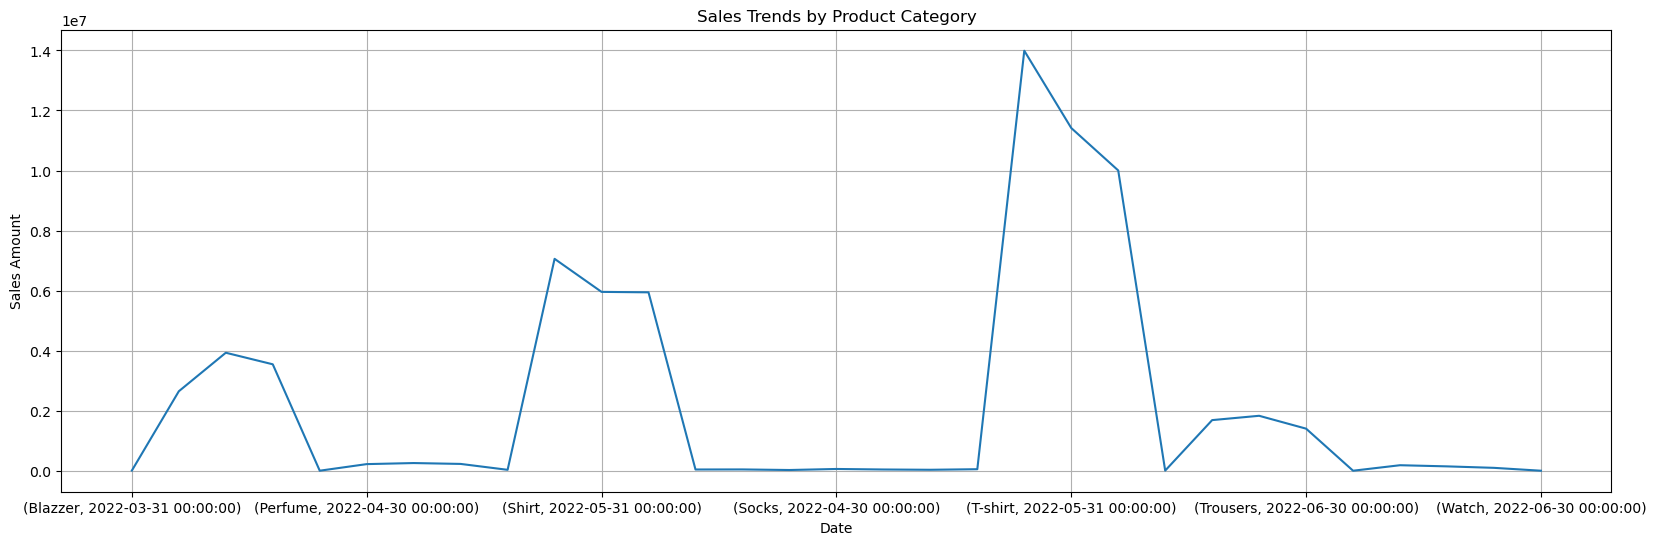

In [458]:
#Plotting Sales trend by category
Category_sales.T.plot(kind='line', figsize=(20,6))
plt.title('Sales Trends by Product Category')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

## Product Analysis


In [436]:
#Analyzing Distribution of product category
Category_distribution = df_copy['Category'].value_counts()

In [438]:
Category_distribution

Category
T-shirt     44052
Shirt       42888
Blazzer     13938
Trousers     9572
Perfume      1017
Wallet        846
Socks         386
Shoes         134
Watch           1
Name: count, dtype: int64

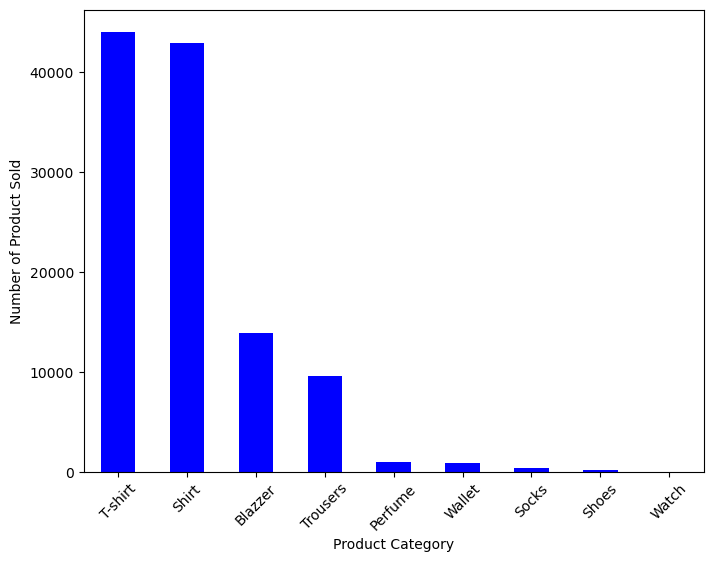

In [467]:
plt.figure(figsize=(8,6))
Category_distribution.plot(kind = 'bar', color = 'blue')
plt.xlabel('Product Category')
plt.ylabel('Number of Product Sold')
plt.xticks(rotation=45)
plt.show()

In [485]:
# Analyzing Distribution of product Sizes
Size_distribution = df_copy['Size'].value_counts()

In [487]:
Size_distribution

Size
M       19731
L       19072
XL      18146
XXL     15595
S       14647
3XL     12717
XS       9418
Free     1998
6XL       643
5XL       496
4XL       371
Name: count, dtype: int64

<Axes: xlabel='Size', ylabel='Qty'>

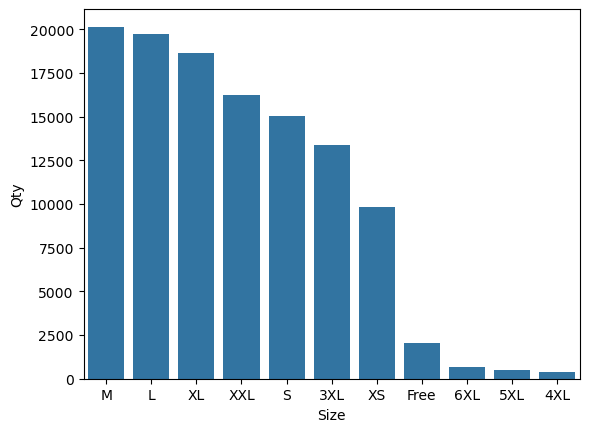

In [489]:
S_Qty = df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)
sns.barplot(x='Size' ,y='Qty' ,data=S_Qty)

In [491]:
#Identify the most popular  Products
popular_products = df_copy.groupby(['Category', 'Size'])['Qty'].sum().sort_values(ascending = False)

In [495]:
popular_products.head(10)

Category  Size
T-shirt   M       7911
Shirt     L       7358
          XL      7223
          M       7142
T-shirt   L       6938
Name: Qty, dtype: int64

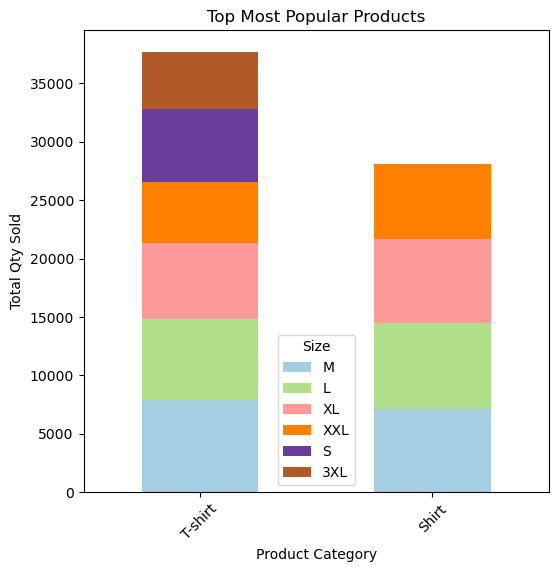

In [503]:
popular_products.head(10).unstack().plot(kind = 'bar', stacked= True,figsize=(6,6), colormap='Paired')
plt.title('Top Most Popular Products')
plt.xlabel('Product Category')
plt.ylabel('Total Qty Sold')
plt.xticks(rotation=45)
plt.show()

In [513]:
#Correlation Trends
correlation_matrix = numeric_df.corr()

In [515]:
correlation_matrix

Qty    Amount  Total Sales
Qty          1.000000  0.056792     0.488467
Amount       0.056792  1.000000     0.849273
Total Sales  0.488467  0.849273     1.000000

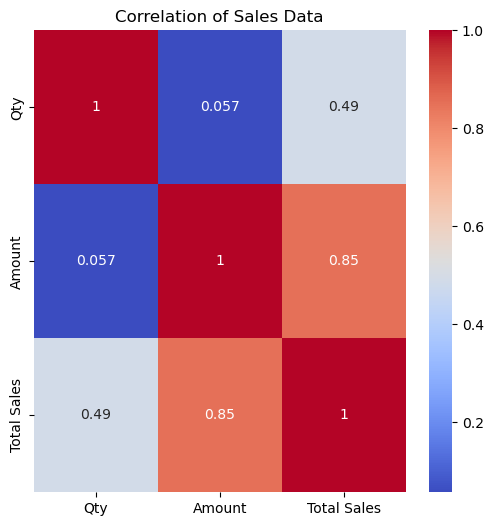

In [523]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of Sales Data')
plt.show()

<Axes: xlabel='Courier Status', ylabel='count'>

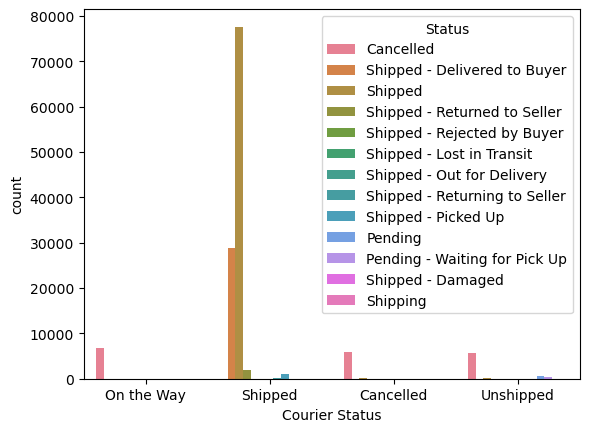

In [384]:
#Courier Status
sns.countplot(data=df, x='Courier Status',hue='Status')

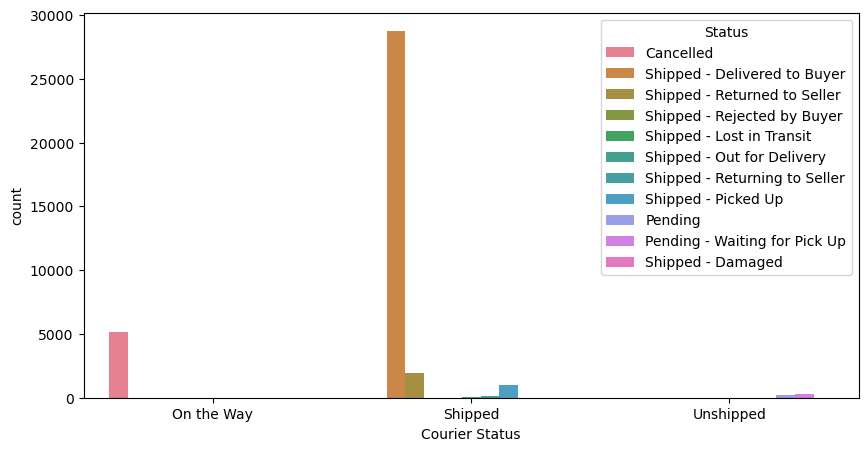

In [124]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df, x='Courier Status',hue='Status')
plt.show()

<Axes: >

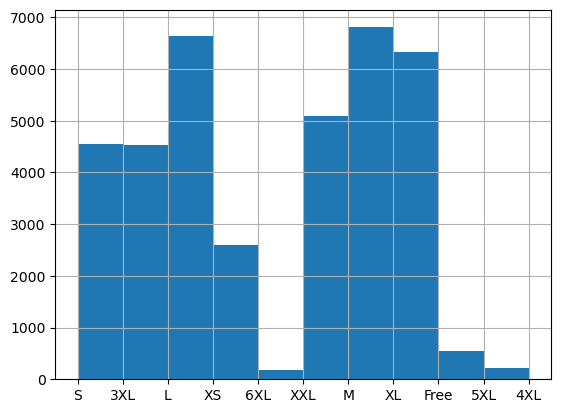

In [126]:
#histogram
df['Size'].hist()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

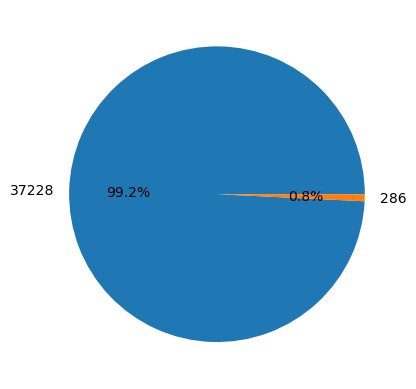

In [135]:
#checking B2B Data by using pie chart
B2B_Check = df['B2B'].value_counts()

#plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
plt.show()

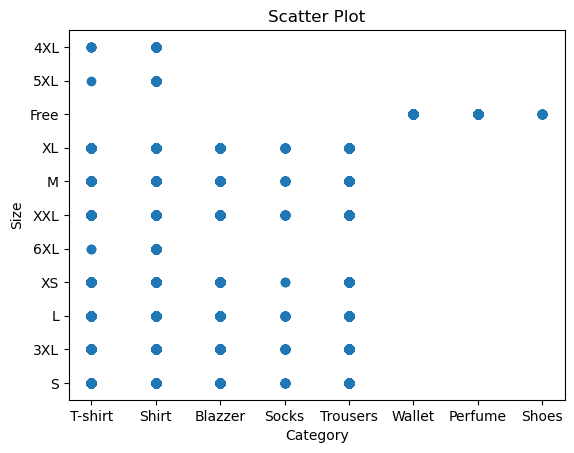

In [137]:
#Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

#plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

In [531]:
#fulfillment Analysis
fulfillment_distribution = df_copy['Fulfilment'].value_counts()

In [533]:
fulfillment_distribution

Fulfilment
Amazon      78164
Merchant    34670
Name: count, dtype: int64

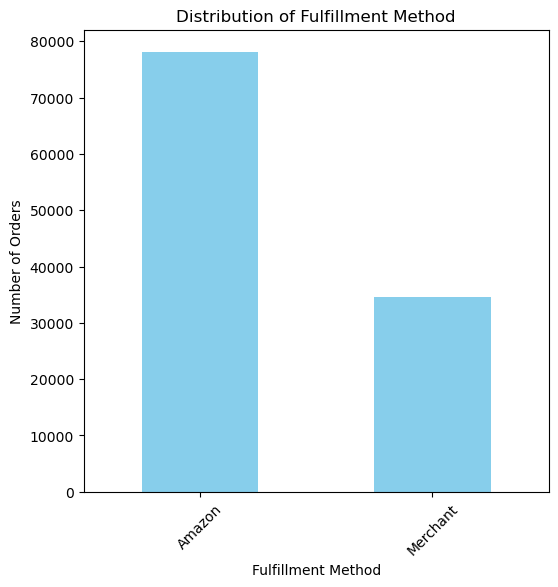

In [537]:
plt.figure(figsize = (6,6))
fulfillment_distribution.plot(kind = 'bar', color='skyblue')
plt.title('Distribution of Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [539]:
# Analyze Service Distribution
service_distribution = df_copy['Service'].value_counts()

In [541]:
service_distribution

Service
Expedited    77251
Standard     35583
Name: count, dtype: int64

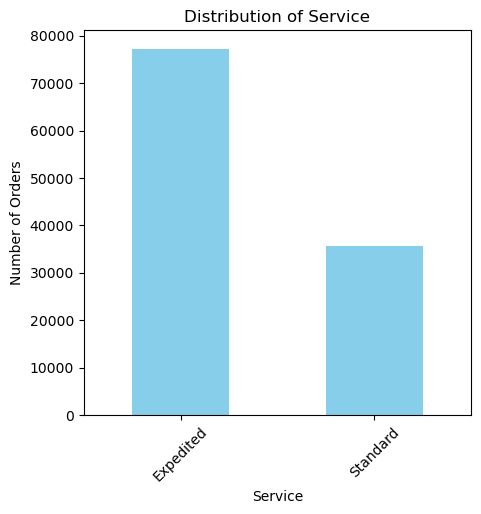

In [545]:
plt.figure(figsize = (5,5))
service_distribution.plot(kind = 'bar', color='skyblue')
plt.title('Distribution of Service')
plt.xlabel('Service')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [551]:
#Geographical Analysis
df_copy['State'].unique()

array(['WEST BENGAL', 'TAMIL NADU', 'KARNATAKA', 'NEW DELHI',
       'MADHYA PRADESH', 'HARYANA', 'UTTAR PRADESH', 'ODISHA',
       'MAHARASHTRA', 'GUJARAT', 'KERALA', 'CHHATTISGARH',
       'ANDHRA PRADESH', 'BIHAR', 'RAJASTHAN', 'GOA', 'TELANGANA',
       'JHARKHAND', 'TRIPURA', 'CHANDIGARH', 'JAMMU & KASHMIR',
       'UTTARAKHAND', 'PUNJAB', 'ASSAM', 'SIKKIM', 'PUDUCHERRY',
       'MEGHALAYA', 'MANIPUR', 'HIMACHAL PRADESH', 'NAGALAND',
       'DADRA AND NAGAR', 'ARUNACHAL PRADESH', 'ANDAMAN & NICOBAR',
       'MIZORAM', 'LADAKH', 'NA', 'LAKSHADWEEP', 'ORISSA',
       'PUNJAB/MOHALI/ZIRAKPUR', 'RAJSHTHAN', 'PONDICHERRY', 'RAJSTHAN'],
      dtype=object)

In [557]:
df_copy['State'] = df_copy['State'].replace('NA', 'NAGALAND')

In [559]:
# Aggregate Sales by State
sales_by_state = df_copy.groupby('State')['Total Sales'].sum().reset_index()

In [561]:
sales_by_state

State  Total Sales
0        ANDAMAN & NICOBAR     138623.0
1           ANDHRA PRADESH    2803870.0
2        ARUNACHAL PRADESH      85415.0
3                    ASSAM     944576.0
4                    BIHAR    1299735.0
5               CHANDIGARH     190573.0
6             CHHATTISGARH     522418.0
7          DADRA AND NAGAR      34976.0
8                      GOA     592715.0
9                  GUJARAT    2432284.0
10                 HARYANA    2653209.0
11        HIMACHAL PRADESH     445436.0
12         JAMMU & KASHMIR     414821.0
13               JHARKHAND     832516.0
14               KARNATAKA    9566741.0
15                  KERALA    3380506.0
16                  LADAKH      36087.0
17             LAKSHADWEEP       2441.0
18          MADHYA PRADESH    1431410.0
19             MAHARASHTRA   12070829.0
20                 MANIPUR     192491.0
21               MEGHALAYA     103896.0
22                 MIZORAM      38343.0
23                NAGALAND     148880.0
24               NEW DELHI    3976609.0
25                  ODISHA    1261644.0
26                  ORISSA       1737.0
27             PONDICHERRY        529.0
28              PUDUCHERRY     159516.0
29                  PUNJAB    1126874.0
30  PUNJAB/MOHALI/ZIRAKPUR        568.0
31               RAJASTHAN    1553704.0
32               RAJSHTHAN        563.0
33                RAJSTHAN        964.0
34                  SIKKIM     129598.0
35              TAMIL NADU    5806896.0
36               TELANGANA    6134184.0
37                 TRIPURA      82779.0
38           UTTAR PRADESH    6189888.0
39             UTTARAKHAND     886892.0
40             WEST BENGAL    3192925.0

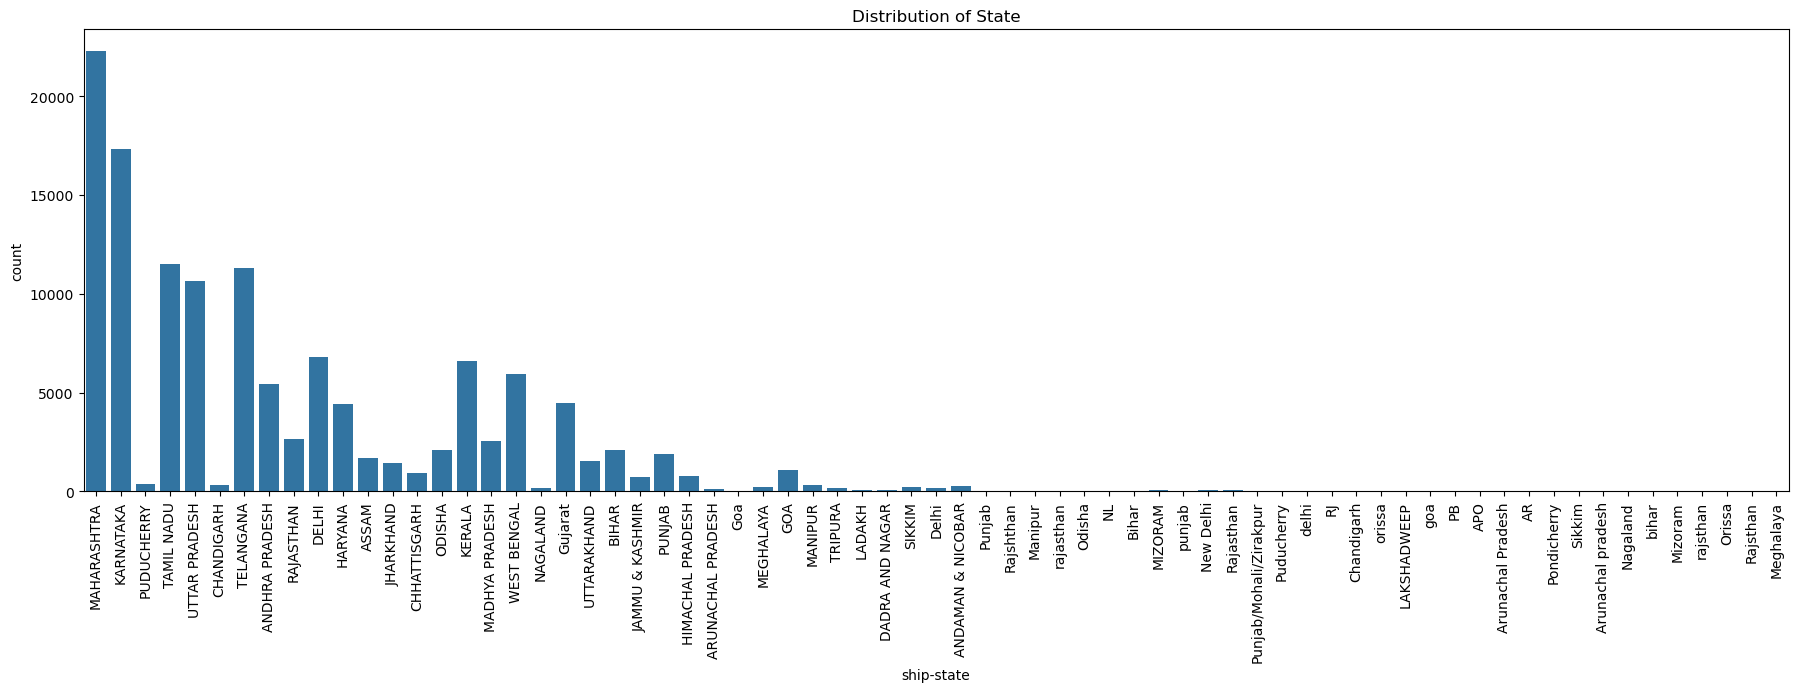

In [563]:
#Plot count of cities by state
plt.figure(figsize=(22,6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

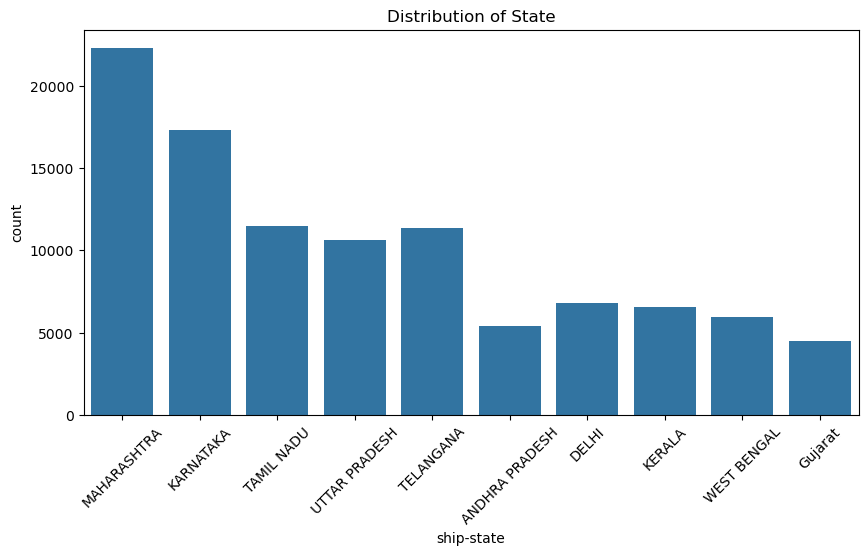

In [575]:
#Top 10 States data
top_10_state = df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=45)
plt.show()

In [595]:
#Comparing Sales Growth between cites and states
monthly_sales_by_state = df_copy.groupby([pd.Grouper(key='Date', freq='ME'), 'State'])['Total Sales'].sum().unstack()
print(monthly_sales_by_state)

State       ANDAMAN & NICOBAR  ANDHRA PRADESH  ARUNACHAL PRADESH     ASSAM  \
Date                                                                         
2022-03-31                NaN          3621.0                NaN       NaN   
2022-04-30            46739.0        961031.0            26857.0  403963.0   
2022-05-31            42018.0        932833.0            31557.0  262681.0   
2022-06-30            49866.0        906385.0            27001.0  277932.0   

State          BIHAR  CHANDIGARH  CHHATTISGARH  DADRA AND NAGAR       GOA  \
Date                                                                        
2022-03-31    4637.0       353.0         899.0              NaN     542.0   
2022-04-30  532406.0     66156.0      201330.0          14531.0  243995.0   
2022-05-31  397405.0     68548.0      178438.0          12938.0  181493.0   
2022-06-30  365287.0     55516.0      141751.0           7507.0  166685.0   

State        GUJARAT  ...  RAJASTHAN  RAJSHTHAN  RAJSTHAN   SIKKIM  

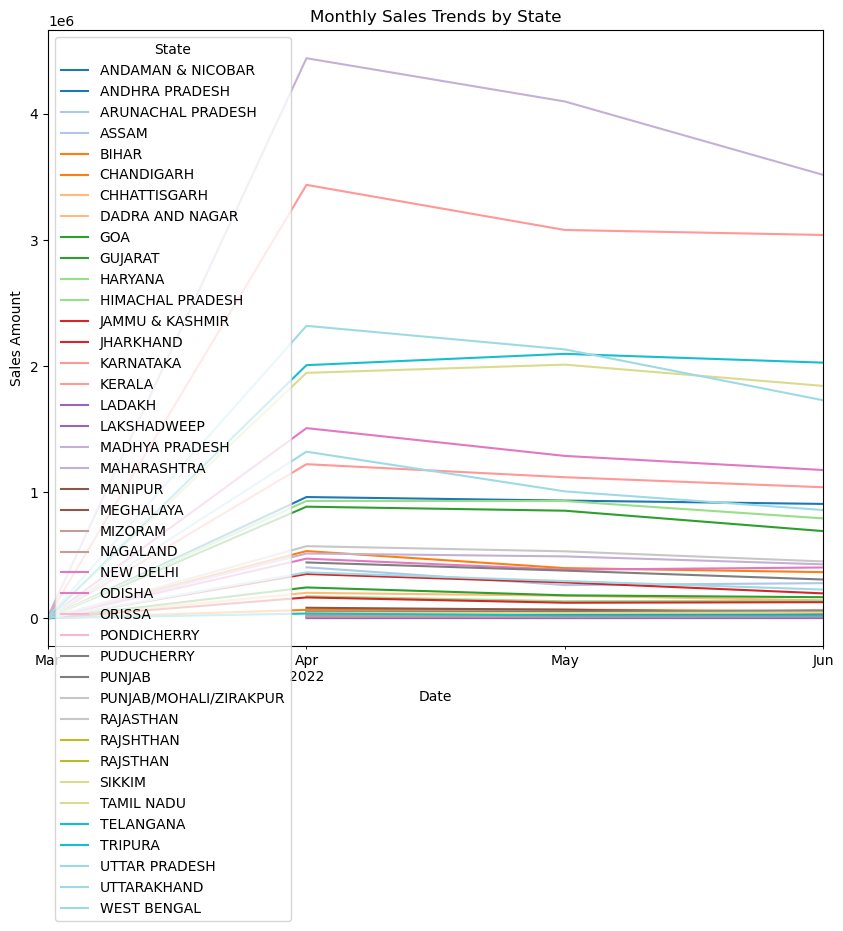

In [601]:
# Plotting the trends
monthly_sales_by_state.plot(kind='line', figsize=(10,8), colormap='tab20')
plt.title('Monthly Sales Trends by State')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

##### April month is the highest sales growth.

# Conclusion
The Amazon Sales Analysis project aims to analyze sales data from Amazon to uncover trends, patterns, and insights that can drive business decisions. Utilizing Python, this project involves data extraction, cleaning, and visualization to provide a comprehensive understanding of sales performance across various dimensions such as time, product categories, and customer demographics.